# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


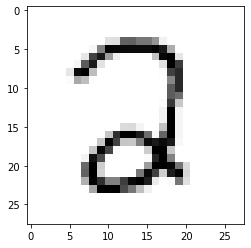

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2469926434377343
train accuracy is: 0.6248539475880487, test accuracy is 0.6164314516129032


Epoch 10 Loss 0.10064230984332687
train accuracy is: 0.9031046569854783, test accuracy is 0.9102822580645161


Epoch 20 Loss 0.06083320728918742
train accuracy is: 0.9353196461358705, test accuracy is 0.9405241935483871


Epoch 30 Loss 0.04686846077935249
train accuracy is: 0.9480053413453514, test accuracy is 0.9526209677419355


Epoch 40 Loss 0.04011950341910662
train accuracy is: 0.9540143548656318, test accuracy is 0.9621975806451613


Epoch 50 Loss 0.036141850076632245
train accuracy is: 0.957436154231347, test accuracy is 0.9642137096774194


Epoch 60 Loss 0.03343801364760297
train accuracy is: 0.9602737439492572, test accuracy is 0.9657258064516129


Epoch 70 Loss 0.031441988866893214
train accuracy is: 0.9618594558504423, test accuracy is 0.9682459677419355


Epoch 80 Loss 0.02986840554600603
train accuracy is: 0.9640293773994325, test accuracy is 0.967741935483871


Epoch 90 Loss 0.02857054788387729
train accuracy is: 0.9662827574695376, test accuracy is 0.969758064516129


Epoch 100 Loss 0.02747998132327038
train accuracy is: 0.9673677182440327, test accuracy is 0.9707661290322581


Epoch 110 Loss 0.026522367114930664
train accuracy is: 0.9683692204974128, test accuracy is 0.9702620967741935


Epoch 120 Loss 0.02567491898074466
train accuracy is: 0.9694541812719079, test accuracy is 0.9702620967741935


Epoch 130 Loss 0.024925406045528696
train accuracy is: 0.9706226005675179, test accuracy is 0.9707661290322581


Epoch 140 Loss 0.02424206131677778
train accuracy is: 0.971874478384243, test accuracy is 0.9707661290322581


Epoch 150 Loss 0.02361177646034152
train accuracy is: 0.9726256050742781, test accuracy is 0.9717741935483871


Epoch 160 Loss 0.023025112902002872
train accuracy is: 0.9732932732431981, test accuracy is 0.9722782258064516


Epoch 170 Loss 0.022465698670161256
train accuracy is: 0.9741278584543482, test accuracy is 0.9727822580645161


Epoch 180 Loss 0.02194811854947601
train accuracy is: 0.9747955266232682, test accuracy is 0.9737903225806451


Epoch 190 Loss 0.021457605074832554
train accuracy is: 0.9752962777499583, test accuracy is 0.9747983870967742


Epoch 200 Loss 0.02099614750366801
train accuracy is: 0.9760474044399933, test accuracy is 0.9747983870967742


Epoch 210 Loss 0.020550441333756542
train accuracy is: 0.9766316140877984, test accuracy is 0.9753024193548387


Epoch 220 Loss 0.020128734782690835
train accuracy is: 0.9773827407778334, test accuracy is 0.9747983870967742


Epoch 230 Loss 0.01971532871854961
train accuracy is: 0.9778834919045235, test accuracy is 0.9747983870967742


Epoch 240 Loss 0.019315334554519677
train accuracy is: 0.9785511600734434, test accuracy is 0.9753024193548387


0.007759364197207111

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.22632044442299185
train accuracy is: 0.7337673176431314, test accuracy is 0.7580645161290323


Epoch 10 Loss 0.1050071294590722
train accuracy is: 0.9053580370555834, test accuracy is 0.9193548387096774


Epoch 20 Loss 0.08054533211471511
train accuracy is: 0.9263061258554498, test accuracy is 0.9390120967741935


Epoch 30 Loss 0.06914061004471007
train accuracy is: 0.9349858120514104, test accuracy is 0.9490927419354839


Epoch 40 Loss 0.062304163756739896
train accuracy is: 0.9406609914872308, test accuracy is 0.953125


Epoch 50 Loss 0.057667140234264704
train accuracy is: 0.9444166249374061, test accuracy is 0.9546370967741935


Epoch 60 Loss 0.054275984514626015
train accuracy is: 0.9470872976130863, test accuracy is 0.9551411290322581


Epoch 70 Loss 0.05166359403068007
train accuracy is: 0.9482557169086964, test accuracy is 0.9556451612903226


Epoch 80 Loss 0.04957529404929287
train accuracy is: 0.9500083458521115, test accuracy is 0.9586693548387096


Epoch 90 Loss 0.047856737683497304
train accuracy is: 0.9515940577532966, test accuracy is 0.9596774193548387


Epoch 100 Loss 0.04641054050984102
train accuracy is: 0.9523451844433317, test accuracy is 0.9596774193548387


Epoch 110 Loss 0.04517333866100116
train accuracy is: 0.9534301452178268, test accuracy is 0.9611895161290323


Epoch 120 Loss 0.044096561493691136
train accuracy is: 0.9546820230345519, test accuracy is 0.9627016129032258


Epoch 130 Loss 0.04314944548104437
train accuracy is: 0.9557669838090469, test accuracy is 0.9627016129032258


Epoch 140 Loss 0.0423064097666797
train accuracy is: 0.956518110499082, test accuracy is 0.9632056451612904


Epoch 150 Loss 0.04155132056579446
train accuracy is: 0.956851944583542, test accuracy is 0.9642137096774194


Epoch 160 Loss 0.040867847287151975
train accuracy is: 0.957436154231347, test accuracy is 0.9647177419354839


Epoch 170 Loss 0.04024597060293629
train accuracy is: 0.9579369053580371, test accuracy is 0.9652217741935484


Epoch 180 Loss 0.03967635712095293
train accuracy is: 0.958103822400267, test accuracy is 0.9652217741935484


Epoch 190 Loss 0.039152822682203464
train accuracy is: 0.9583541979636121, test accuracy is 0.9647177419354839


Epoch 200 Loss 0.03866887429538894
train accuracy is: 0.9590218661325322, test accuracy is 0.9647177419354839


Epoch 210 Loss 0.0382189475712678
train accuracy is: 0.9594391587381071, test accuracy is 0.9642137096774194


Epoch 220 Loss 0.03780033467228155
train accuracy is: 0.9599399098647972, test accuracy is 0.9647177419354839


Epoch 230 Loss 0.03740874530127036
train accuracy is: 0.9601902854281422, test accuracy is 0.9657258064516129


Epoch 240 Loss 0.03704136920948331
train accuracy is: 0.9605241195126022, test accuracy is 0.9662298387096774


0.01623998401997381

### Comparing results of NN and LR

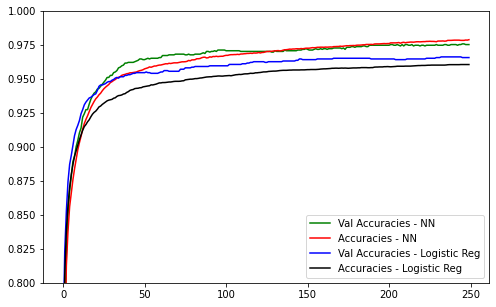

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

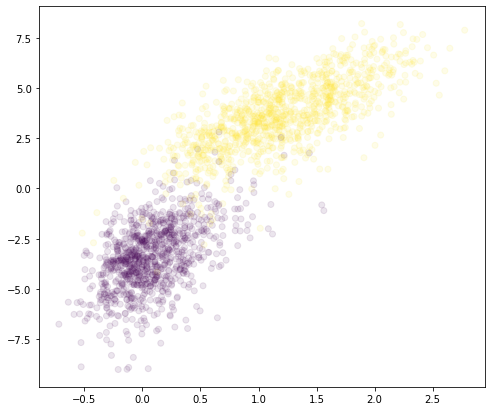

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

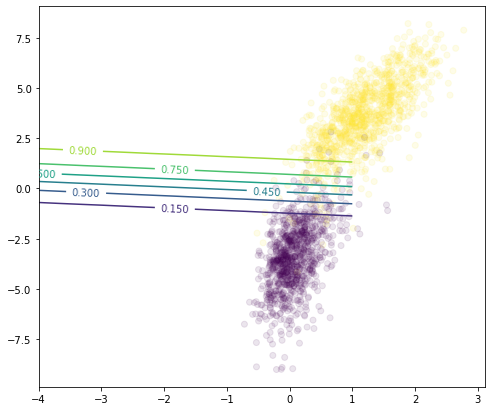

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );